# East Bay vs. Westbay Weather

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
from datetime import datetime
from matplotlib import rc

%matplotlib inline

In [2]:
data = pd.read_csv('662148.csv', parse_dates=True, index_col=5)

In [3]:
data.index.name = 'DATE'

In [4]:
data = data.reset_index()

## Clean up the data

In [5]:
data = data.replace([-9999,9999],[np.nan,np.nan])

In [6]:
data[['TOBS', 'TMIN', 'TMAX']] = data[['TOBS', 'TMIN', 'TMAX']] / 10.

In [7]:
dataPA = data[data['STATION_NAME'] == 'PALO ALTO CA US']

## Study temperature trends

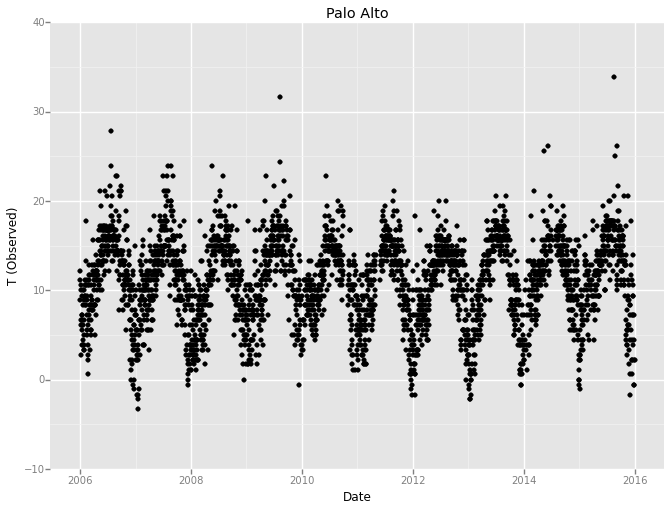

<ggplot: (289138237)>

In [8]:
ggplot(aes(x='DATE',y='TOBS'),data=dataPA) + \
    geom_point() + \
    labs(title='Palo Alto', x='Date', y='T (Observed)')

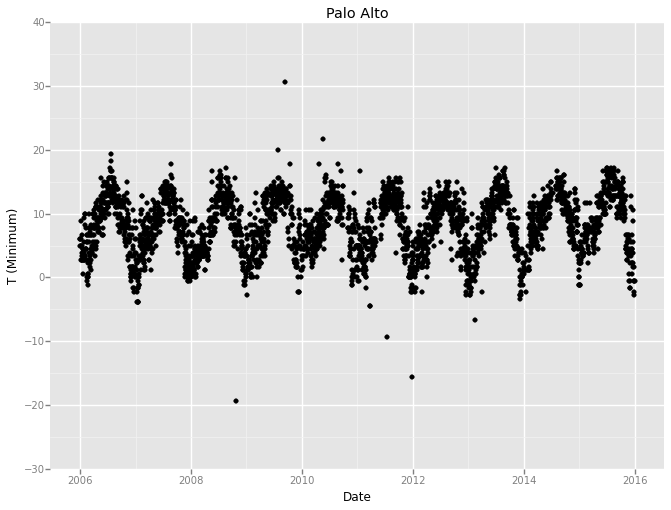

<ggplot: (289429665)>

In [9]:
ggplot(aes(x='DATE',y='TMIN'),data=dataPA) + \
    geom_point() + \
    labs(title='Palo Alto', x='Date', y='T (Minimum)')

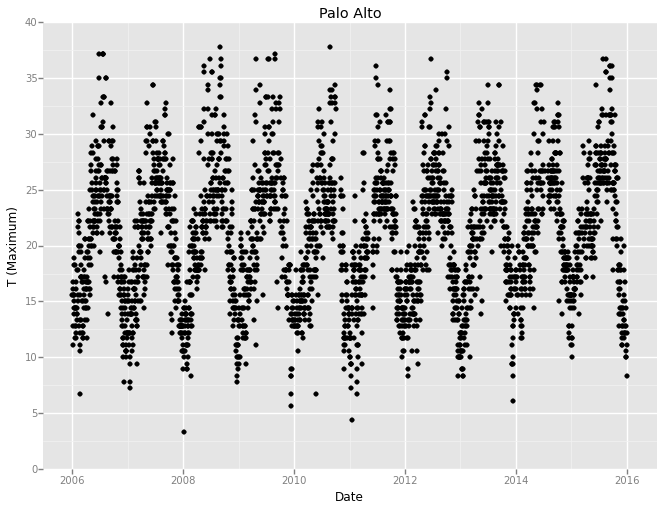

<ggplot: (289409249)>

In [10]:
ggplot(aes(x='DATE',y='TMAX'),data=dataPA) + \
    geom_point() + \
    labs(title='Palo Alto', x='Date', y='T (Maximum)')

In [11]:
dataFremont = data[data['STATION_NAME'] == 'FREMONT CA US']

In [12]:
dataFremont = dataFremont.reset_index()

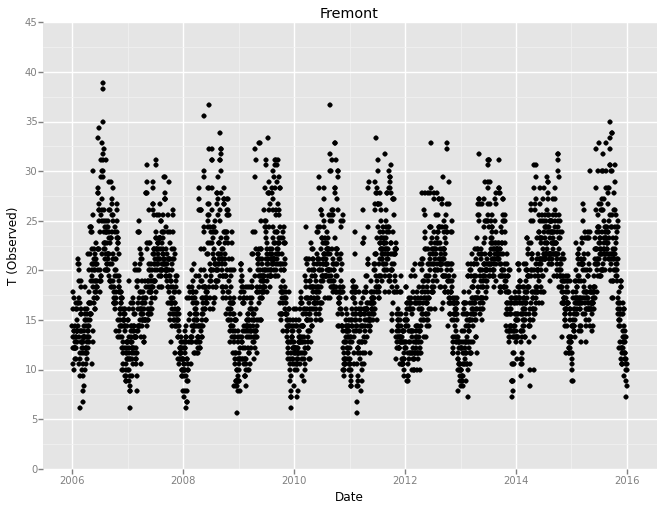

<ggplot: (289434809)>

In [13]:
ggplot(aes(x='DATE',y='TOBS'),data=dataFremont) + \
    geom_point() + \
    labs(title='Fremont', x='Date', y='T (Observed)')

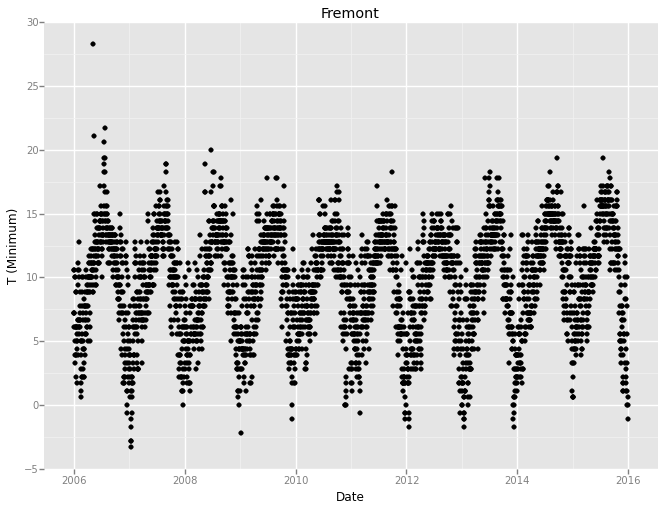

<ggplot: (289429589)>

In [14]:
ggplot(aes(x='DATE',y='TMIN'),data=dataFremont) + \
    geom_point() + \
    labs(title='Fremont', x='Date', y='T (Minimum)')

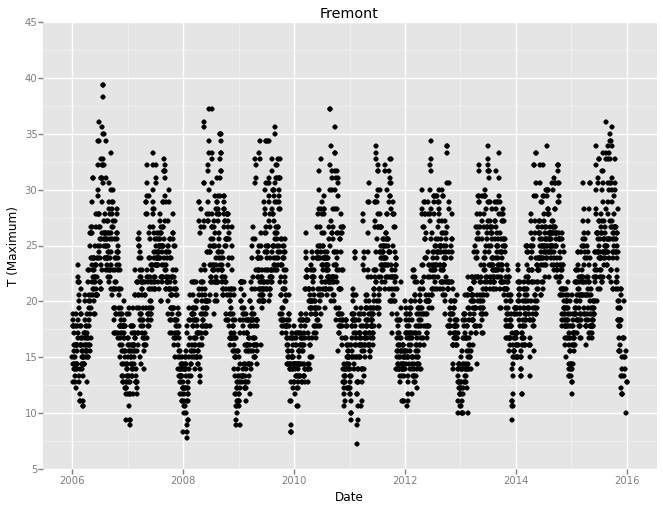

<ggplot: (289543377)>

In [15]:
ggplot(aes(x='DATE',y='TMAX'),data=dataFremont) + \
    geom_point() + \
    labs(title='Fremont', x='Date', y='T (Maximum)')

In [16]:
dataPATemp = pd.DataFrame(dataPA[['DATE','STATION', 'STATION_NAME', 'TOBS', 'TMIN', 'TMAX']])

In [17]:
dataFremontTemp = pd.DataFrame(dataFremont[['DATE','STATION', 'STATION_NAME', 'TOBS', 'TMIN', 'TMAX']])

In [18]:
dataTempCombine = pd.merge(dataPATemp, dataFremontTemp, on='DATE', suffixes=('_PA', '_Fremont'))

In [19]:
dataTempCombine['TMIN_diff'] = dataTempCombine['TMIN_PA'].sub(dataTempCombine['TMIN_Fremont'])

In [20]:
dataTempCombine['TMAX_diff'] = dataTempCombine['TMAX_PA'].sub(dataTempCombine['TMAX_Fremont'])

In [21]:
dataTempCombine['TOBS_diff'] = dataTempCombine['TOBS_PA'].sub(dataTempCombine['TMAX_Fremont'])

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


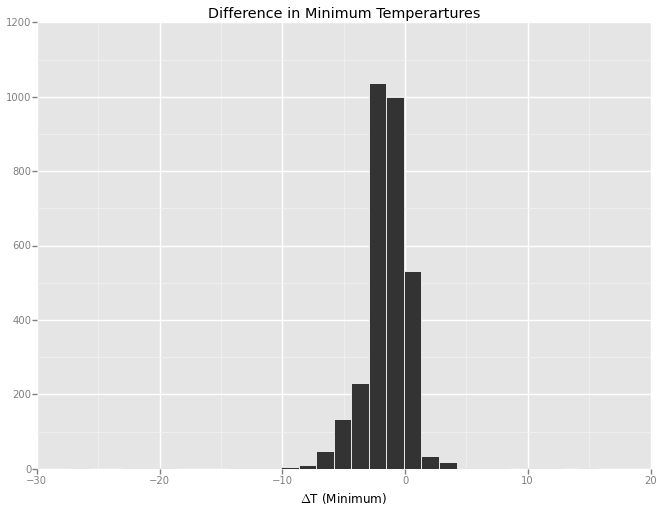

<ggplot: (291525409)>

In [22]:
ggplot(aes(x='TMIN_diff'),data=dataTempCombine) + \
    geom_histogram() + \
    labs(title='Difference in Minimum Temperartures', x=r'$\Delta$T (Minimum)')

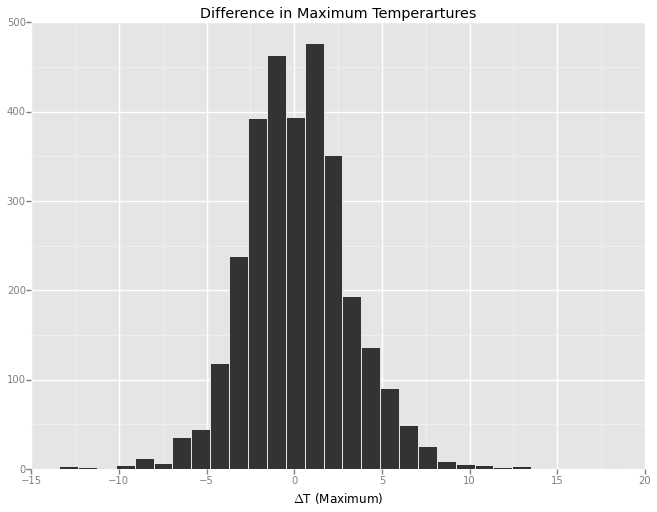

<ggplot: (294585065)>

In [24]:
ggplot(aes(x='TMAX_diff'),data=dataTempCombine) + \
    geom_histogram() + \
    labs(title='Difference in Maximum Temperartures', x=r'$\Delta$T (Maximum)')

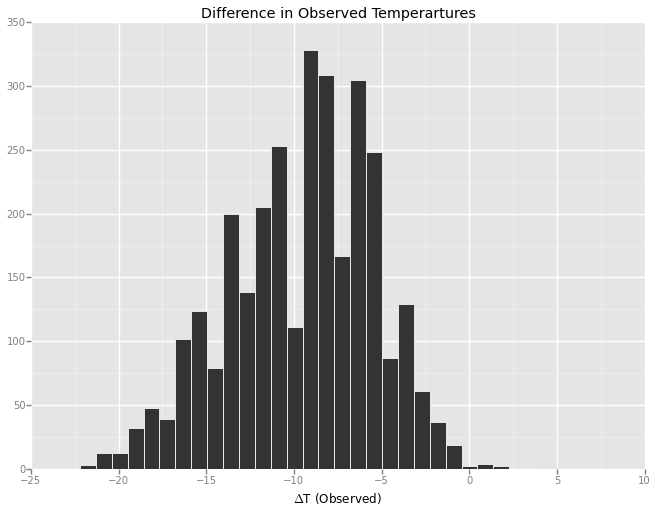

<ggplot: (292413293)>

In [25]:
ggplot(aes(x='TOBS_diff'),data=dataTempCombine) + \
    geom_histogram() + \
    labs(title='Difference in Observed Temperartures', x=r'$\Delta$T (Observed)')